In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, FunctionTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score
pd.set_option('display.float_format', '{:.4f}'.format)
np.set_printoptions(suppress=True, precision=4)

In [2]:
players = pd.read_csv("hitters.csv")
players = players.dropna()
players.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5000,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0000,A


## Part I: Different Model Specs

A: Regression without Regularization

1. Create a pipeline that includes all the columns as predictors for Salary, and performs ordinary linear regression

In [3]:
X = players.drop("Salary", axis=1)
y = players[['Salary']]

In [4]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

OLSA1 = Pipeline(
  [("preprocessing", ct),
  ("OLS", LinearRegression())]
)
ct.fit_transform(X)

,dummify__League_A,dummify__League_N,dummify__Division_E,dummify__Division_W,dummify__NewLeague_A,dummify__NewLeague_N,standardize__AtBat,standardize__Hits,standardize__HmRun,standardize__Runs,...,standardize__Years,standardize__CAtBat,standardize__CHits,standardize__CHmRun,standardize__CRuns,standardize__CRBI,standardize__CWalks,standardize__PutOuts,standardize__Assists,standardize__Errors
1,0.0000,1.0000,0.0000,1.0000,0.0000,1.0000,-0.6029,-0.5957,-0.5286,-1.2061,...,1.3979,0.3468,0.1744,-0.0029,-0.1217,0.2590,0.4353,1.2215,-0.5232,0.2134
2,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.5125,0.4923,0.7300,0.4415,...,-0.9012,-0.4529,-0.4099,-0.0761,-0.4151,-0.1996,0.0104,2.1091,-0.2539,0.8200
3,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.6282,0.7365,0.9588,0.4023,...,0.7709,1.3016,1.3182,1.8986,1.4121,1.5727,0.3557,-0.3247,-0.7442,-0.8482
4,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,-0.5621,-0.4625,-0.1853,-0.6177,...,-1.1102,-0.9909,-0.9602,-0.6977,-0.9475,-0.8812,-0.8623,1.8407,-0.5439,-0.6966
5,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,1.2947,1.3582,-0.8718,0.7553,...,0.7709,0.7670,0.6350,-0.6124,0.4228,0.0173,-0.2514,-0.0312,2.0872,2.4881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.6350,0.4257,-0.5286,0.4023,...,-0.4832,0.0199,0.1295,-0.4539,0.0538,-0.0602,-0.4639,0.1227,-0.7580,-0.8482
318,1.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.6010,0.6255,-0.7574,0.8338,...,0.9799,1.2503,1.2193,-0.3686,1.6208,0.3736,2.3325,0.0798,1.8110,1.7299
319,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.4853,0.4034,-0.9862,0.2454,...,-0.2742,-0.4196,-0.4470,-0.7586,-0.4363,-0.7356,-0.4336,-0.9081,-0.0398,-0.2416
320,1.0000,0.0000,1.0000,0.0000,1.0000,0.0000,1.1519,0.8031,-0.2997,1.1869,...,0.1438,0.2368,0.2084,0.3384,0.3291,0.2776,0.2722,3.6624,0.0845,0.5167


2. Fit this pipeline to the full dataset, and interpret a few of the most important coefficients.



In [5]:
fittedA1 = OLSA1.fit(X,y)

In [6]:
pd.DataFrame({'Feature':ct.fit_transform(X).columns, "Coefs":fittedA1.named_steps['OLS'].coef_[0]})

,Feature,Coefs
0,dummify__League_A,-31.2997
1,dummify__League_N,31.2997
2,dummify__Division_E,58.4246
3,dummify__Division_W,-58.4246
4,dummify__NewLeague_A,12.3812
5,dummify__NewLeague_N,-12.3812
6,standardize__AtBat,-291.0946
7,standardize__Hits,337.8305
8,standardize__HmRun,37.8538
9,standardize__Runs,-60.5725


Holding all other features constant, we would expect to see salary to increase by 480.75 for every 1 increase in Career Runs. Holding all other features constant, we would expect to see salary to decrease by 391.04 dollars for every 1 increase in Career at bats. Holding all other features constant, we would expect to see salary increase by 337.8 dollars for every 1 increase in Hits.

3. Use cross-validation to estimate the MSE you would expect if you used this pipeline to predict 1989 salaries.

In [7]:
cvA1 = cross_val_score(fittedA1, X, y, cv=5, scoring = 'neg_mean_squared_error')
abs(cvA1).mean()

121136.31031816883

B: Ridge Regression

1. Create a pipeline that includes all the columns as predictors for Salary, and performs ordinary ridge regression

In [1]:
from sklearn.model_selection import GridSearchCV
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

ridgeB1 = Pipeline(
  [("preprocessing", ct),
  ("Ridge", Ridge())]
)

NameError: name 'ColumnTransformer' is not defined

2. Use cross-validation to tune the 
 hyperparameter.

In [9]:
lambdas = {'Ridge__alpha': [.001,.01,.1,1,10,100,1000]}

gscv1 = GridSearchCV(ridgeB1, lambdas, cv = 5, scoring='r2')

In [10]:
gscvfit = gscv1.fit(X,y)

In [11]:
pd.DataFrame(data = {"lambdas": [.001,.01,.1,1,10,100,1000], "scores": gscvfit.cv_results_['mean_test_score']})

,lambdas,scores
0,0.0010,0.3436
1,0.0100,0.3441
2,0.1000,0.3477
3,1.0000,0.3558
4,10.0000,0.3683
5,100.0000,0.3850
6,1000.0000,0.3329


3. Fit the pipeline with your chosen lambda
 to the full dataset, and interpret a few of the most important coefficients.

In [12]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

ridgeB3 = Pipeline(
  [("preprocessing", ct),
  ("Ridge", Ridge(100))]
)

In [13]:
ridgeB3fit = ridgeB3.fit(X,y)
ridgeB3fit.named_steps["Ridge"].coef_

array([[-11.0518,  11.0518,  38.0232, -38.0232,  -4.0916,   4.0916,
         -0.5674,  49.6124,  -1.4642,  29.3433,  22.958 ,  41.3846,
         -2.7083,  24.7058,  44.5343,  38.6853,  45.5076,  47.1456,
          4.0364,  56.8815,   7.4572, -13.3824]])

In [14]:
pd.DataFrame({'Feature':ct.fit_transform(X).columns, "Coefs":ridgeB3fit.named_steps["Ridge"].coef_[0]})

,Feature,Coefs
0,dummify__League_A,-11.0518
1,dummify__League_N,11.0518
2,dummify__Division_E,38.0232
3,dummify__Division_W,-38.0232
4,dummify__NewLeague_A,-4.0916
5,dummify__NewLeague_N,4.0916
6,standardize__AtBat,-0.5674
7,standardize__Hits,49.6124
8,standardize__HmRun,-1.4642
9,standardize__Runs,29.3433


Holding all other features, we expect to see for every 1 increase in Walks, we expect that on average salary will increase by 41.4 dollars. Holding all other features constant, we expect to see for every 1 increase in Career RBIs, we expect that on average salary will increase by 47.1.

4. Report the MSE you would expect if you used this pipeline to predict 1989 salaries.

In [15]:
cvB3 = cross_val_score(ridgeB3fit, X, y, cv=5, scoring = 'neg_mean_squared_error')
abs(cvB3).mean()

120716.43558937623

C. Lasso Regression

1. Create a pipeline that includes all the columns as predictors for Salary, and performs lasso regression

In [16]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

lassoC1 = Pipeline(
  [("preprocessing", ct),
  ("Lasso", Lasso())]
)

2. Use cross-validation to tune the 
 hyperparameter.

In [17]:
lasso = {'Lasso__alpha': [.001,.01,.1,1,10,100,1000]}

gscvLassoC = GridSearchCV(lassoC1, lasso, cv = 5, scoring='r2')

In [18]:
gscvLassoCfit = gscvLassoC.fit(X,y)

C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.004e+07, tolerance: 4.708e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.984e+06, tolerance: 3.606e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+07, toler

In [19]:
pd.DataFrame(data = {"lasso_alpha": [.001,.01,.1,1,10,100,1000], "scores": gscvLassoCfit.cv_results_['mean_test_score']})

,lasso_alpha,scores
0,0.0010,0.3442
1,0.0100,0.3444
2,0.1000,0.3460
3,1.0000,0.3542
4,10.0000,0.3695
5,100.0000,0.2984
6,1000.0000,-0.0432


3. Fit the pipeline with your chosen 
 to the full dataset, and interpret a few of the most important coefficients.

In [20]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

lassoC1 = Pipeline(
  [("preprocessing", ct),
  ("Lasso", Lasso(10))]
)

In [21]:
C1fit = lassoC1.fit(X,y)
C1fit.named_steps['Lasso'].coef_

array([ -0.    ,   0.    ,  95.4132,  -0.    ,  -0.    ,   0.    ,
        -0.    ,  88.7416,   0.    ,   0.    ,   0.    ,  49.9028,
        -0.    ,   0.    ,   0.    ,   0.    ,  72.2275, 134.032 ,
        -0.    ,  66.737 ,   0.    ,  -4.1583])

In [22]:
pd.DataFrame({'Feature':ct.fit_transform(X).columns, "Coefs":C1fit.named_steps['Lasso'].coef_})

,Feature,Coefs
0,dummify__League_A,-0.0000
1,dummify__League_N,0.0000
2,dummify__Division_E,95.4132
3,dummify__Division_W,-0.0000
4,dummify__NewLeague_A,-0.0000
5,dummify__NewLeague_N,0.0000
6,standardize__AtBat,-0.0000
7,standardize__Hits,88.7416
8,standardize__HmRun,0.0000
9,standardize__Runs,0.0000


All variables that are not zero are relevant because Lasso regression automatically feature selects. Holding all other features constant, we epect an average increase of 134.03 dollars for every 1 increase in Career RBIs. Holding all other features constant, we epect an average increase of 95.4 dollars if a division is in the East.

4. Report the MSE you would expect if you used this pipeline to predict 1989 salaries.

In [23]:
cvC3 = cross_val_score(C1fit, X, y, cv=5, scoring = 'neg_mean_squared_error')
abs(cvB3).mean()

120716.43558937623

D. Elastic Net

1. Create a pipeline that includes all the columns as predictors for Salary, and performs ordinary ridge regression

In [24]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

EN_D = Pipeline(
  [("preprocessing", ct),
  ("Elastic_Net", ElasticNet())]
)
ct.fit_transform(X)

,dummify__League_A,dummify__League_N,dummify__Division_E,dummify__Division_W,dummify__NewLeague_A,dummify__NewLeague_N,standardize__AtBat,standardize__Hits,standardize__HmRun,standardize__Runs,...,standardize__Years,standardize__CAtBat,standardize__CHits,standardize__CHmRun,standardize__CRuns,standardize__CRBI,standardize__CWalks,standardize__PutOuts,standardize__Assists,standardize__Errors
1,0.0000,1.0000,0.0000,1.0000,0.0000,1.0000,-0.6029,-0.5957,-0.5286,-1.2061,...,1.3979,0.3468,0.1744,-0.0029,-0.1217,0.2590,0.4353,1.2215,-0.5232,0.2134
2,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.5125,0.4923,0.7300,0.4415,...,-0.9012,-0.4529,-0.4099,-0.0761,-0.4151,-0.1996,0.0104,2.1091,-0.2539,0.8200
3,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.6282,0.7365,0.9588,0.4023,...,0.7709,1.3016,1.3182,1.8986,1.4121,1.5727,0.3557,-0.3247,-0.7442,-0.8482
4,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,-0.5621,-0.4625,-0.1853,-0.6177,...,-1.1102,-0.9909,-0.9602,-0.6977,-0.9475,-0.8812,-0.8623,1.8407,-0.5439,-0.6966
5,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,1.2947,1.3582,-0.8718,0.7553,...,0.7709,0.7670,0.6350,-0.6124,0.4228,0.0173,-0.2514,-0.0312,2.0872,2.4881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.6350,0.4257,-0.5286,0.4023,...,-0.4832,0.0199,0.1295,-0.4539,0.0538,-0.0602,-0.4639,0.1227,-0.7580,-0.8482
318,1.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.6010,0.6255,-0.7574,0.8338,...,0.9799,1.2503,1.2193,-0.3686,1.6208,0.3736,2.3325,0.0798,1.8110,1.7299
319,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.4853,0.4034,-0.9862,0.2454,...,-0.2742,-0.4196,-0.4470,-0.7586,-0.4363,-0.7356,-0.4336,-0.9081,-0.0398,-0.2416
320,1.0000,0.0000,1.0000,0.0000,1.0000,0.0000,1.1519,0.8031,-0.2997,1.1869,...,0.1438,0.2368,0.2084,0.3384,0.3291,0.2776,0.2722,3.6624,0.0845,0.5167


2. Use cross-validation to tune the 
 and 
 hyperparameters.



In [25]:
EN = {'Elastic_Net__alpha': [.001,.01,.1,1,10,100,1000], "Elastic_Net__l1_ratio": [.001,.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]}

gscvEN = GridSearchCV(EN_D, EN, cv = 5, scoring='r2')

In [26]:
gscvEnfit = gscvEN.fit(X,y)

C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.045e+07, tolerance: 4.708e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.228e+06, tolerance: 3.606e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.036e+07, toler

C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.621e+06, tolerance: 4.558e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.015e+07, tolerance: 4.708e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.010e+06, toler

C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.525e+06, tolerance: 4.281e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.550e+06, tolerance: 4.558e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.005e+07, toler

C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.947e+04, tolerance: 4.558e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.597e+05, tolerance: 4.708e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.940e+05, toler

In [27]:
gscvEnfit.best_params_

{'Elastic_Net__alpha': 1, 'Elastic_Net__l1_ratio': 0.2}

3. Fit the pipeline with your chosen hyperparameters to the full dataset, and interpret a few of the most important coefficients.

In [28]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

EN_D = Pipeline(
  [("preprocessing", ct),
  ("Elastic_Net", ElasticNet(alpha = 1, l1_ratio=.2))]
)

In [29]:
EnDfit = EN_D.fit(X,y)
EnDfit.named_steps['Elastic_Net'].coef_

array([ -7.2486,   7.2486,  26.104 , -26.104 ,  -4.1165,   4.1165,
        12.1794,  37.4507,   5.61  ,  27.011 ,  22.9832,  34.5686,
         7.6342,  25.8674,  36.1248,  32.3124,  36.9431,  37.8805,
        15.3558,  44.8351,   3.8366,  -8.0362])

In [30]:
pd.DataFrame({'Feature':ct.fit_transform(X).columns, "Coefs":EnDfit.named_steps['Elastic_Net'].coef_})

,Feature,Coefs
0,dummify__League_A,-7.2486
1,dummify__League_N,7.2486
2,dummify__Division_E,26.1040
3,dummify__Division_W,-26.1040
4,dummify__NewLeague_A,-4.1165
5,dummify__NewLeague_N,4.1165
6,standardize__AtBat,12.1794
7,standardize__Hits,37.4507
8,standardize__HmRun,5.6100
9,standardize__Runs,27.0110


Holding all other variables constant, we expect that for every 1 increase in PutOuts, salary will increase on average by 44.84 dollars. Holding all other variables constant, we expect that for every 1 increase in Career RBIs, salary will increase on average by 37.88 dollars.

4. Report the MSE you would expect if you used this pipeline to predict 1989 salaries.

In [31]:
END3 = cross_val_score(EnDfit, X, y, cv=5, scoring = 'neg_mean_squared_error')
abs(END3).mean()

121500.81646251371

## Part II: Variable Selection

In [32]:
#Absolute magnitude of coeficients
Features = pd.DataFrame({'Feature': ct.fit_transform(X).columns,
                         "OLS_coefs": abs(fittedA1.named_steps['OLS'].coef_)[0],
                         "Ridge_coefs": abs(ridgeB3fit.named_steps["Ridge"].coef_)[0],
                         "Lasso_coefs": abs(C1fit.named_steps['Lasso'].coef_), 
                         "EN_coefs": abs(EnDfit.named_steps['Elastic_Net'].coef_)
                        })

In [33]:
Features

,Feature,OLS_coefs,Ridge_coefs,Lasso_coefs,EN_coefs
0,dummify__League_A,31.2997,11.0518,0.0000,7.2486
1,dummify__League_N,31.2997,11.0518,0.0000,7.2486
2,dummify__Division_E,58.4246,38.0232,95.4132,26.1040
3,dummify__Division_W,58.4246,38.0232,0.0000,26.1040
4,dummify__NewLeague_A,12.3812,4.0916,0.0000,4.1165
5,dummify__NewLeague_N,12.3812,4.0916,0.0000,4.1165
6,standardize__AtBat,291.0946,0.5674,0.0000,12.1794
7,standardize__Hits,337.8305,49.6124,88.7416,37.4507
8,standardize__HmRun,37.8538,1.4642,0.0000,5.6100
9,standardize__Runs,60.5725,29.3433,0.0000,27.0110


The numeric variable that is the most important is Career RBIs as it has the highest magnitude Lasso coefficient and the second highest Elastic Net coefficient.

The five numeric variables that are the most important are, Career Runs, Hits, Putouts, Career RBIs, and walks.

The categorical variable that is the most important is the Division variable.

OLS:

In [34]:
ct = ColumnTransformer(
  [
    ("standardize",
    StandardScaler(),
    ['CRBI'])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

OLSnum1 = Pipeline(
  [("preprocessing", ct),
  ("OLS", LinearRegression())]
)
OLSnum1fit = OLSnum1.fit(X,y)
OLSnum11 = cross_val_score(OLSnum1fit, X, y, cv=5, scoring = 'neg_mean_squared_error')
abs(OLSnum11).mean()

142142.865462403

In [35]:
ct = ColumnTransformer(
  [
    ("standardize",
    StandardScaler(),
    ['CRBI', 'Hits', 'CRuns', 'PutOuts', 'Walks'])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

OLSnum5 = Pipeline(
  [("preprocessing", ct),
  ("OLS", LinearRegression())]
)
OLSnum5fit = OLSnum5.fit(X,y)
OLSnum55 = cross_val_score(OLSnum5fit, X, y, cv=5, scoring = 'neg_mean_squared_error')
abs(OLSnum55).mean()

121332.85377811702

In [39]:
ct1 = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    ["Division"]),
    ("standardize",
    StandardScaler(),
    ['CRBI', 'Hits', 'CRuns', 'PutOuts', 'Walks'])   
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

ct2 = ColumnTransformer(
  [
      ("Interaction", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__CRBI", "dummify__Division_E"]),
    ("Interaction2", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__Hits", "dummify__Division_E"]),
      ("Interaction3", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__CRuns", "dummify__Division_E"]),
      ("Interaction4", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__PutOuts", "dummify__Division_E"]),
      ("Interaction5", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__Walks", "dummify__Division_E"])
    
  ],
  remainder = "drop"
).set_output(transform = "pandas")

ct3 = ColumnTransformer(
    [
        ("keep", FunctionTransformer(lambda x:x), ['Interaction__standardize__CRBI',
                                                    'Interaction__standardize__CRBI dummify__Division_E',
                                                    'Interaction2__standardize__Hits',
                                                    'Interaction2__standardize__Hits dummify__Division_E',
                                                    'Interaction3__standardize__CRuns',
                                                    'Interaction3__standardize__CRuns dummify__Division_E',
                                                    'Interaction4__standardize__PutOuts',
                                                    'Interaction4__standardize__PutOuts dummify__Division_E',
                                                    'Interaction5__standardize__Walks',
                                                    'Interaction5__standardize__Walks dummify__Division_E'
                                                   ])
    ],
    remainder = 'drop'
).set_output(transform = 'pandas')


OLSint = Pipeline(
  [("preprocessing", ct1),
   ("preprocessing2", ct2),
   ("preprocessing3", ct3),
  ("OLS", LinearRegression())]
)

C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


In [38]:
ct2.fit_transform(ct1.fit_transform(X))

,Interaction__standardize__CRBI,Interaction__dummify__Division_E,Interaction__standardize__CRBI dummify__Division_E,Interaction2__standardize__Hits,Interaction2__dummify__Division_E,Interaction2__standardize__Hits dummify__Division_E,Interaction3__standardize__CRuns,Interaction3__dummify__Division_E,Interaction3__standardize__CRuns dummify__Division_E,Interaction4__standardize__PutOuts,Interaction4__dummify__Division_E,Interaction4__standardize__PutOuts dummify__Division_E,Interaction5__standardize__Walks,Interaction5__dummify__Division_E,Interaction5__standardize__Walks dummify__Division_E
1,0.2590,0.0000,0.0000,-0.5957,0.0000,-0.0000,-0.1217,0.0000,-0.0000,1.2215,0.0000,0.0000,-0.0975,0.0000,-0.0000
2,-0.1996,0.0000,-0.0000,0.4923,0.0000,0.0000,-0.4151,0.0000,-0.0000,2.1091,0.0000,0.0000,1.6094,0.0000,0.0000
3,1.5727,1.0000,1.5727,0.7365,1.0000,0.7365,1.4121,1.0000,1.4121,-0.3247,1.0000,-0.3247,-0.1898,1.0000,-0.1898
4,-0.8812,1.0000,-0.8812,-0.4625,1.0000,-0.4625,-0.9475,1.0000,-0.9475,1.8407,1.0000,1.8407,-0.5127,1.0000,-0.5127
5,0.0173,0.0000,0.0000,1.3582,0.0000,0.0000,0.4228,0.0000,0.0000,-0.0312,0.0000,-0.0000,-0.2821,0.0000,-0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-0.0602,1.0000,-0.0602,0.4257,1.0000,0.4257,0.0538,1.0000,0.0538,0.1227,1.0000,0.1227,-0.1898,1.0000,-0.1898
318,0.3736,1.0000,0.3736,0.6255,1.0000,0.6255,1.6208,1.0000,1.6208,0.0798,1.0000,0.0798,2.4398,1.0000,2.4398
319,-0.7356,0.0000,-0.0000,0.4034,0.0000,0.0000,-0.4363,0.0000,-0.0000,-0.9081,0.0000,-0.0000,0.5022,0.0000,0.0000
320,0.2776,1.0000,0.2776,0.8031,1.0000,0.8031,0.3291,1.0000,0.3291,3.6624,1.0000,3.6624,1.7016,1.0000,1.7016


In [40]:
OLSintfit = OLSint.fit(X,y)
OLSintfit.named_steps['OLS'].coef_
OLSint3 = cross_val_score(OLSintfit, X, y, cv=5, scoring = 'r2')
abs(OLSint3).mean()

0.4064172875029392

Ridge Regression:

In [117]:
ct = ColumnTransformer(
  [
    ("standardize",
    StandardScaler(),
    ["CRBI"])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

ridgenum1 = Pipeline(
  [("preprocessing", ct),
  ("Ridge", Ridge())]
)

In [118]:
lambdas = {'Ridge__alpha': [.001,.01,.1,1,10,100,1000]}

gscvRR1 = GridSearchCV(ridgenum1, lambdas, cv = 5, scoring='r2')

In [119]:
gscvRR1fit = gscvRR1.fit(X,y)

pd.DataFrame(data = {"lambdas": [.001,.01,.1,1,10,100,1000], "scores": gscvRR1fit.cv_results_['mean_test_score']})

,lambdas,scores
0,0.0010,0.2814
1,0.0100,0.2814
2,0.1000,0.2814
3,1.0000,0.2817
4,10.0000,0.2830
5,100.0000,0.2592
6,1000.0000,0.0674


In [120]:
ct = ColumnTransformer(
  [
    ("standardize",
    StandardScaler(),
    ["CRBI"])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

ridgenum1 = Pipeline(
  [("preprocessing", ct),
  ("Ridge", Ridge(10))]
)

In [121]:
RRfit = ridgenum1.fit(X,y)
RR1 = cross_val_score(RRfit, X, y, cv=5, scoring = 'neg_mean_squared_error')
abs(RR1).mean()

142096.24206102983

In [122]:
ct = ColumnTransformer(
  [
    ("standardize",
    StandardScaler(),
    ['CRBI', 'Hits', 'CRuns', 'PutOuts', 'Walks'])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

ridgenum5 = Pipeline(
  [("preprocessing", ct),
  ("Ridge", Ridge())]
)

In [123]:
lambdas = {'Ridge__alpha': [.001,.01,.1,1,10,100,1000]}

gscvRR5 = GridSearchCV(ridgenum5, lambdas, cv = 5, scoring='r2')

In [124]:
gscvRR5fit = gscvRR5.fit(X,y)

pd.DataFrame(data = {"lambdas": [.001,.01,.1,1,10,100,1000], "scores": gscvRR5fit.cv_results_['mean_test_score']})

,lambdas,scores
0,0.0010,0.3772
1,0.0100,0.3772
2,0.1000,0.3774
3,1.0000,0.3786
4,10.0000,0.3859
5,100.0000,0.4001
6,1000.0000,0.2321


In [125]:
ct = ColumnTransformer(
  [
    ("standardize",
    StandardScaler(),
    ['CRBI', 'Hits', 'CRuns', 'PutOuts', 'Walks'])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

RR5 = Pipeline(
  [("preprocessing", ct),
  ("Ridge", Ridge(100))]
)

In [126]:
RR5fit = RR5.fit(X,y)
RR55 = cross_val_score(RR5fit, X, y, cv=5, scoring = 'neg_mean_squared_error')
abs(RR55).mean()

119398.40011345323

In [127]:
ct1 = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    ["Division"]),
    ("standardize",
    StandardScaler(),
    ['CRBI', 'Hits', 'CRuns', 'PutOuts', 'Walks'])   
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

ct2 = ColumnTransformer(
  [
      ("Interaction", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__CRBI", "dummify__Division_E"]),
    ("Interaction2", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__Hits", "dummify__Division_E"]),
      ("Interaction3", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__CRuns", "dummify__Division_E"]),
      ("Interaction4", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__PutOuts", "dummify__Division_E"]),
      ("Interaction5", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__Walks", "dummify__Division_E"])
    
  ],
  remainder = "drop"
).set_output(transform = "pandas")

ct3 = ColumnTransformer(
    [
        ("keep", FunctionTransformer(lambda x:x), ['Interaction__standardize__CRBI',
                                                    'Interaction__standardize__CRBI dummify__Division_E',
                                                    'Interaction2__standardize__Hits',
                                                    'Interaction2__standardize__Hits dummify__Division_E',
                                                    'Interaction3__standardize__CRuns',
                                                    'Interaction3__standardize__CRuns dummify__Division_E',
                                                    'Interaction4__standardize__PutOuts',
                                                    'Interaction4__standardize__PutOuts dummify__Division_E',
                                                    'Interaction5__standardize__Walks',
                                                    'Interaction5__standardize__Walks dummify__Division_E'
                                                   ])
    ],
    remainder = 'drop'
).set_output(transform = 'pandas')


Ridgeint = Pipeline(
  [("preprocessing", ct1),
   ("preprocessing2", ct2),
   ("preprocessing3", ct3),
  ("Ridge", Ridge())]
)

C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.


In [128]:
lambdas = {'Ridge__alpha': [.001,.01,.1,1,10,100,1000]}

gscvRidgeint = GridSearchCV(Ridgeint, lambdas, cv = 5, scoring='r2')

In [129]:
gscvRRintfit = gscvRidgeint.fit(X,y)

pd.DataFrame(data = {"lambdas": [.001,.01,.1,1,10,100,1000], "scores": gscvRRintfit.cv_results_['mean_test_score']})

,lambdas,scores
0,0.0010,0.3013
1,0.0100,0.3018
2,0.1000,0.3061
3,1.0000,0.3286
4,10.0000,0.3624
5,100.0000,0.4012
6,1000.0000,0.2779


In [130]:
ct1 = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    ["Division"]),
    ("standardize",
    StandardScaler(),
    ['CRBI', 'Hits', 'CRuns', 'PutOuts', 'Walks'])   
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

ct2 = ColumnTransformer(
  [
      ("Interaction", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__CRBI", "dummify__Division_E"]),
    ("Interaction2", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__Hits", "dummify__Division_E"]),
      ("Interaction3", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__CRuns", "dummify__Division_E"]),
      ("Interaction4", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__PutOuts", "dummify__Division_E"]),
      ("Interaction5", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__Walks", "dummify__Division_E"])
    
  ],
  remainder = "drop"
).set_output(transform = "pandas")

ct3 = ColumnTransformer(
    [
        ("keep", FunctionTransformer(lambda x:x), ['Interaction__standardize__CRBI',
                                                    'Interaction__standardize__CRBI dummify__Division_E',
                                                    'Interaction2__standardize__Hits',
                                                    'Interaction2__standardize__Hits dummify__Division_E',
                                                    'Interaction3__standardize__CRuns',
                                                    'Interaction3__standardize__CRuns dummify__Division_E',
                                                    'Interaction4__standardize__PutOuts',
                                                    'Interaction4__standardize__PutOuts dummify__Division_E',
                                                    'Interaction5__standardize__Walks',
                                                    'Interaction5__standardize__Walks dummify__Division_E'
                                                   ])
    ],
    remainder = 'drop'
).set_output(transform = 'pandas')


Ridgeint1 = Pipeline(
  [("preprocessing", ct1),
   ("preprocessing2", ct2),
   ("preprocessing3", ct3),
  ("Ridge", Ridge(100))]
)

C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.


In [131]:
RRintfit1 = Ridgeint1.fit(X,y)
RRint1 = cross_val_score(RRintfit1, X, y, cv=5, scoring = 'neg_mean_squared_error')
abs(RRint1).mean()

117932.87576960745

Lasso Regression:

In [132]:
ct = ColumnTransformer(
  [
    ("standardize",
    StandardScaler(),
    ['CRBI'])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

Lassonum1 = Pipeline(
  [("preprocessing", ct),
  ("Lasso1", Lasso())]
)
alphas = {'Lasso1__alpha': [.001,.01,.1,1,10,100,1000]}

gscvLasso1 = GridSearchCV(Lassonum1, alphas, cv = 5, scoring='r2')
gscvLasso1fit = gscvLasso1.fit(X,y)
pd.DataFrame(data = {"alphas": [.001,.01,.1,1,10,100,1000], "scores": gscvLasso1fit.cv_results_['mean_test_score']})

,alphas,scores
0,0.0010,0.2814
1,0.0100,0.2814
2,0.1000,0.2814
3,1.0000,0.2815
4,10.0000,0.2822
5,100.0000,0.2380
6,1000.0000,-0.0432


In [133]:
ct = ColumnTransformer(
  [
    ("standardize",
    StandardScaler(),
    ['CRBI'])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

Lassonum11 = Pipeline(
  [("preprocessing", ct),
  ("Lasso1", Lasso(10))]
)

In [134]:
Lasso11fit = Lassonum11.fit(X,y)
Lasso111 = cross_val_score(Lasso11fit, X, y, cv=5, scoring = 'neg_mean_squared_error')
abs(Lasso111).mean()

142236.17109795552

In [135]:
ct = ColumnTransformer(
  [
    ("standardize",
    StandardScaler(),
    ['CRBI', 'Hits', 'CRuns', 'PutOuts', 'Walks'])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

Lasso5 = Pipeline(
  [("preprocessing", ct),
  ("Lasso5", Lasso())]
)

In [136]:
alphas = {'Lasso5__alpha': [.001,.01,.1,1,10,100,1000]}

gscvLasso5 = GridSearchCV(Lasso5, alphas, cv = 5, scoring='r2')
gscvLasso5fit = gscvLasso5.fit(X,y)
pd.DataFrame(data = {"alphas": [.001,.01,.1,1,10,100,1000], "scores": gscvLasso5fit.cv_results_['mean_test_score']})

,alphas,scores
0,0.0010,0.3772
1,0.0100,0.3772
2,0.1000,0.3773
3,1.0000,0.3777
4,10.0000,0.3807
5,100.0000,0.3038
6,1000.0000,-0.0432


In [137]:
ct = ColumnTransformer(
  [
    ("standardize",
    StandardScaler(),
    ['CRBI', 'Hits', 'CRuns', 'PutOuts', 'Walks'])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

Lasso55 = Pipeline(
  [("preprocessing", ct),
  ("Lasso5", Lasso(10))]
)

In [138]:
Lasso55fit = Lasso55.fit(X,y)
Lasso51 = cross_val_score(Lasso55fit, X, y, cv=5, scoring = 'neg_mean_squared_error')
abs(Lasso51).mean()

121601.43804542515

In [139]:
ct1 = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    ["Division"]),
    ("standardize",
    StandardScaler(),
    ['CRBI', 'Hits', 'CRuns', 'PutOuts', 'Walks'])   
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

ct2 = ColumnTransformer(
  [
      ("Interaction", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__CRBI", "dummify__Division_E"]),
    ("Interaction2", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__Hits", "dummify__Division_E"]),
      ("Interaction3", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__CRuns", "dummify__Division_E"]),
      ("Interaction4", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__PutOuts", "dummify__Division_E"]),
      ("Interaction5", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__Walks", "dummify__Division_E"])
    
  ],
  remainder = "drop"
).set_output(transform = "pandas")

ct3 = ColumnTransformer(
    [
        ("keep", FunctionTransformer(lambda x:x), ['Interaction__standardize__CRBI',
                                                    'Interaction__standardize__CRBI dummify__Division_E',
                                                    'Interaction2__standardize__Hits',
                                                    'Interaction2__standardize__Hits dummify__Division_E',
                                                    'Interaction3__standardize__CRuns',
                                                    'Interaction3__standardize__CRuns dummify__Division_E',
                                                    'Interaction4__standardize__PutOuts',
                                                    'Interaction4__standardize__PutOuts dummify__Division_E',
                                                    'Interaction5__standardize__Walks',
                                                    'Interaction5__standardize__Walks dummify__Division_E'
                                                   ])
    ],
    remainder = 'drop'
).set_output(transform = 'pandas')


Lasint = Pipeline(
  [("preprocessing", ct1),
   ("preprocessing2", ct2),
   ("preprocessing3", ct3),
  ("Lasso", Lasso())]
)

C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.


In [140]:
alphas = {'Lasso__alpha': [.001,.01,.1,1,10,100,1000]}

gscvLassoint = GridSearchCV(Lasint, alphas, cv = 5, scoring='r2')
gscvLassointfit = gscvLassoint.fit(X,y)
pd.DataFrame(data = {"alphas": [.001,.01,.1,1,10,100,1000], "scores": gscvLassointfit.cv_results_['mean_test_score']})

,alphas,scores
0,0.0010,0.3013
1,0.0100,0.3015
2,0.1000,0.3042
3,1.0000,0.3268
4,10.0000,0.3690
5,100.0000,0.3038
6,1000.0000,-0.0432


In [141]:
ct1 = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    ["Division"]),
    ("standardize",
    StandardScaler(),
    ['CRBI', 'Hits', 'CRuns', 'PutOuts', 'Walks'])   
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

ct2 = ColumnTransformer(
  [
      ("Interaction", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__CRBI", "dummify__Division_E"]),
    ("Interaction2", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__Hits", "dummify__Division_E"]),
      ("Interaction3", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__CRuns", "dummify__Division_E"]),
      ("Interaction4", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__PutOuts", "dummify__Division_E"]),
      ("Interaction5", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__Walks", "dummify__Division_E"])
    
  ],
  remainder = "drop"
).set_output(transform = "pandas")

ct3 = ColumnTransformer(
    [
        ("keep", FunctionTransformer(lambda x:x), ['Interaction__standardize__CRBI',
                                                    'Interaction__standardize__CRBI dummify__Division_E',
                                                    'Interaction2__standardize__Hits',
                                                    'Interaction2__standardize__Hits dummify__Division_E',
                                                    'Interaction3__standardize__CRuns',
                                                    'Interaction3__standardize__CRuns dummify__Division_E',
                                                    'Interaction4__standardize__PutOuts',
                                                    'Interaction4__standardize__PutOuts dummify__Division_E',
                                                    'Interaction5__standardize__Walks',
                                                    'Interaction5__standardize__Walks dummify__Division_E'
                                                   ])
    ],
    remainder = 'drop'
).set_output(transform = 'pandas')


Lasint1 = Pipeline(
  [("preprocessing", ct1),
   ("preprocessing2", ct2),
   ("preprocessing3", ct3),
  ("Lasso", Lasso(10))]
)

C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.


In [142]:
Lassoint1fit = Lasint1.fit(X,y)
Lassoint1 = cross_val_score(Lassoint1fit, X, y, cv=5, scoring = 'neg_mean_squared_error')
abs(Lassoint1).mean()

122985.04351685068

Elastic Net:

In [143]:
ct = ColumnTransformer(
  [
    ("standardize",
    StandardScaler(),
    ['CRBI'])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

EN1 = Pipeline(
  [("preprocessing", ct),
  ("Elastic_Net1", ElasticNet())]
)

In [144]:
EN = {'Elastic_Net1__alpha': [.001,.01,.1,1,10,100,1000], "Elastic_Net1__l1_ratio": [.001,.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]}

gscvEN1 = GridSearchCV(EN1, EN, cv = 5, scoring='r2')
gscvEN1fit = gscvEN1.fit(X,y)

In [145]:
gscvEN1fit.best_params_

{'Elastic_Net1__alpha': 0.1, 'Elastic_Net1__l1_ratio': 0.2}

In [146]:
ct = ColumnTransformer(
  [
    ("standardize",
    StandardScaler(),
    ['CRBI'])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

EN1 = Pipeline(
  [("preprocessing", ct),
  ("Elastic_Net1", ElasticNet(alpha = .1, l1_ratio = .2))]
)

In [147]:
EN1fit = EN1.fit(X,y)
EN11 = cross_val_score(EN1fit, X, y, cv=5, scoring = 'neg_mean_squared_error')
abs(EN11).mean()

142205.83928425395

In [148]:
ct = ColumnTransformer(
  [
    ("standardize",
    StandardScaler(),
    ['CRBI', 'Hits', 'CRuns', 'PutOuts', 'Walks'])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

EN5 = Pipeline(
  [("preprocessing", ct),
  ("EN5", ElasticNet())]
)
EN = {'EN5__alpha': [.001,.01,.1,1,10,100,1000], "EN5__l1_ratio": [.001,.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]}

gscvEN5 = GridSearchCV(EN5, EN, cv = 5, scoring='r2')
gscvEN5fit = gscvEN5.fit(X,y)
gscvEN5fit.best_params_

{'EN5__alpha': 1, 'EN5__l1_ratio': 0.6}

In [149]:
ct = ColumnTransformer(
  [
    ("standardize",
    StandardScaler(),
    ['CRBI', 'Hits', 'CRuns', 'PutOuts', 'Walks'])
  ],
  remainder = "drop"
).set_output(transform = "pandas")

EN55 = Pipeline(
  [("preprocessing", ct),
  ("EN5", ElasticNet(alpha = 1, l1_ratio = .6))]
)

In [150]:
EN55fit = EN55.fit(X,y)
EN555 = cross_val_score(EN55fit, X, y, cv=5, scoring = 'neg_mean_squared_error')
abs(EN555).mean()

119107.81676162352

In [151]:
ct1 = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    ["Division"]),
    ("standardize",
    StandardScaler(),
    ['CRBI', 'Hits', 'CRuns', 'PutOuts', 'Walks'])   
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

ct2 = ColumnTransformer(
  [
      ("Interaction", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__CRBI", "dummify__Division_E"]),
    ("Interaction2", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__Hits", "dummify__Division_E"]),
      ("Interaction3", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__CRuns", "dummify__Division_E"]),
      ("Interaction4", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__PutOuts", "dummify__Division_E"]),
      ("Interaction5", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__Walks", "dummify__Division_E"])
    
  ],
  remainder = "drop"
).set_output(transform = "pandas")

ct3 = ColumnTransformer(
    [
        ("keep", FunctionTransformer(lambda x:x), ['Interaction__standardize__CRBI',
                                                    'Interaction__standardize__CRBI dummify__Division_E',
                                                    'Interaction2__standardize__Hits',
                                                    'Interaction2__standardize__Hits dummify__Division_E',
                                                    'Interaction3__standardize__CRuns',
                                                    'Interaction3__standardize__CRuns dummify__Division_E',
                                                    'Interaction4__standardize__PutOuts',
                                                    'Interaction4__standardize__PutOuts dummify__Division_E',
                                                    'Interaction5__standardize__Walks',
                                                    'Interaction5__standardize__Walks dummify__Division_E'
                                                   ])
    ],
    remainder = 'drop'
).set_output(transform = 'pandas')


ENint = Pipeline(
  [("preprocessing", ct1),
   ("preprocessing2", ct2),
   ("preprocessing3", ct3),
  ("ENint", ElasticNet())]
)
EN = {'ENint__alpha': [.001,.01,.1,1,10,100,1000], "ENint__l1_ratio": [.001,.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]}

gscvENint = GridSearchCV(ENint, EN, cv = 5, scoring='r2')
gscvENintfit = gscvENint.fit(X,y)
gscvENintfit.best_params_

C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.


{'ENint__alpha': 1, 'ENint__l1_ratio': 0.4}

In [152]:
ct1 = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    ["Division"]),
    ("standardize",
    StandardScaler(),
    ['CRBI', 'Hits', 'CRuns', 'PutOuts', 'Walks'])   
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

ct2 = ColumnTransformer(
  [
      ("Interaction", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__CRBI", "dummify__Division_E"]),
    ("Interaction2", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__Hits", "dummify__Division_E"]),
      ("Interaction3", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__CRuns", "dummify__Division_E"]),
      ("Interaction4", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__PutOuts", "dummify__Division_E"]),
      ("Interaction5", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__Walks", "dummify__Division_E"])
    
  ],
  remainder = "drop"
).set_output(transform = "pandas")

ct3 = ColumnTransformer(
    [
        ("keep", FunctionTransformer(lambda x:x), ['Interaction__standardize__CRBI',
                                                    'Interaction__standardize__CRBI dummify__Division_E',
                                                    'Interaction2__standardize__Hits',
                                                    'Interaction2__standardize__Hits dummify__Division_E',
                                                    'Interaction3__standardize__CRuns',
                                                    'Interaction3__standardize__CRuns dummify__Division_E',
                                                    'Interaction4__standardize__PutOuts',
                                                    'Interaction4__standardize__PutOuts dummify__Division_E',
                                                    'Interaction5__standardize__Walks',
                                                    'Interaction5__standardize__Walks dummify__Division_E'
                                                   ])
    ],
    remainder = 'drop'
).set_output(transform = 'pandas')


ENint1 = Pipeline(
  [("preprocessing", ct1),
   ("preprocessing2", ct2),
   ("preprocessing3", ct3),
  ("ENint", ElasticNet(alpha = 1, l1_ratio = .4))]
)

C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.


In [153]:
ENint1fit = ENint1.fit(X,y)
ENint11 = cross_val_score(ENint1fit, X, y, cv=5, scoring = 'neg_mean_squared_error')
abs(ENint11).mean()

118031.82010450665

The model and features that performed the best based on the MSE was using the five best numeric variables and their interactions in an Elastic Net Model.

## Part III: Discussion:

A. Ridge: 
    
Compare your Ridge models with your ordinary regression models. How did your coefficients compare? Why does this make sense?

The OLS model coefficients tend to have a much higher magnitude than the Ridge model coefficients. This makes sense because in OLS there is no penalty for high magnitude (i.e. no regularization). The ridge regression loss function keeps the coefficients lower than in OLS.

B. Lasso:

Compare your LASSO model in I with your three LASSO models in II. Did you get the same lambda 
 results? Why does this make sense? Did you get the same MSEs? Why does this make sense?

The Lasso model in 1 as well as the three Lasso models in II all had the same lambda of 10. This makes sense because the model takes in very similar subsets of data and feature selects automatically which narrows our lambda value. I got different MSEs for each model because even though lasso feature selects, some of the variables that were included in some of the models were not options to be included in other models.

C. Elastic Net:

Compare your MSEs for the Elastic Net models with those for the Ridge and LASSO models. Why does it make sense that Elastic Net always “wins”?

It makes sense that Elastic Net always wins because it combines both Lasso and Ridge regression and balances the bias-variance tradeoff well. In other words, Elastic Net balances SSE, the Ridge penalty, and the lasso penalty.

Part IV: Final Model
    
Fit your final best pipeline on the full dataset, and summarize your results in a few short sentences and a plot.

In [154]:
ct1 = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    ["Division"]),
    ("standardize",
    StandardScaler(),
    ['CRBI', 'Hits', 'CRuns', 'PutOuts', 'Walks'])   
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

ct2 = ColumnTransformer(
  [
      ("Interaction", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__CRBI", "dummify__Division_E"]),
    ("Interaction2", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__Hits", "dummify__Division_E"]),
      ("Interaction3", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__CRuns", "dummify__Division_E"]),
      ("Interaction4", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__PutOuts", "dummify__Division_E"]),
      ("Interaction5", PolynomialFeatures(interaction_only=True, include_bias = False), ["standardize__Walks", "dummify__Division_E"])
    
  ],
  remainder = "drop"
).set_output(transform = "pandas")

ct3 = ColumnTransformer(
    [
        ("keep", FunctionTransformer(lambda x:x), ['Interaction__standardize__CRBI',
                                                    'Interaction__standardize__CRBI dummify__Division_E',
                                                    'Interaction2__standardize__Hits',
                                                    'Interaction2__standardize__Hits dummify__Division_E',
                                                    'Interaction3__standardize__CRuns',
                                                    'Interaction3__standardize__CRuns dummify__Division_E',
                                                    'Interaction4__standardize__PutOuts',
                                                    'Interaction4__standardize__PutOuts dummify__Division_E',
                                                    'Interaction5__standardize__Walks',
                                                    'Interaction5__standardize__Walks dummify__Division_E'
                                                   ])
    ],
    remainder = 'drop'
).set_output(transform = 'pandas')


Final = Pipeline(
  [("preprocessing", ct1),
   ("preprocessing2", ct2),
   ("preprocession3", ct3),
  ("Final", ElasticNet(alpha = 1, l1_ratio = .001))]
)


C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.


In [155]:
Finalfit = Final.fit(X,y)
Final1 = cross_val_score(Finalfit, X, y, cv=5, scoring = 'neg_mean_squared_error')
abs(Final1).mean()

119516.9932223149

In [156]:
Final_df = pd.DataFrame({"Features": ct3.fit_transform(ct2.fit_transform(ct1.fit_transform(X))).columns,
                         "Coeficients": Finalfit.named_steps['Final'].coef_})
Final_df = Final_df.sort_values("Coeficients", ascending = False).reset_index()
Final_df

,index,Features,Coeficients
0,0,keep__Interaction__standardize__CRBI,64.7856
1,4,keep__Interaction3__standardize__CRuns,62.2894
2,2,keep__Interaction2__standardize__Hits,47.9305
3,8,keep__Interaction5__standardize__Walks,39.7748
4,1,keep__Interaction__standardize__CRBI dummify__...,35.8150
5,6,keep__Interaction4__standardize__PutOuts,33.8621
6,5,keep__Interaction3__standardize__CRuns dummify...,31.2464
7,9,keep__Interaction5__standardize__Walks dummify...,26.3675
8,3,keep__Interaction2__standardize__Hits dummify_...,25.8889
9,7,keep__Interaction4__standardize__PutOuts dummi...,25.3332


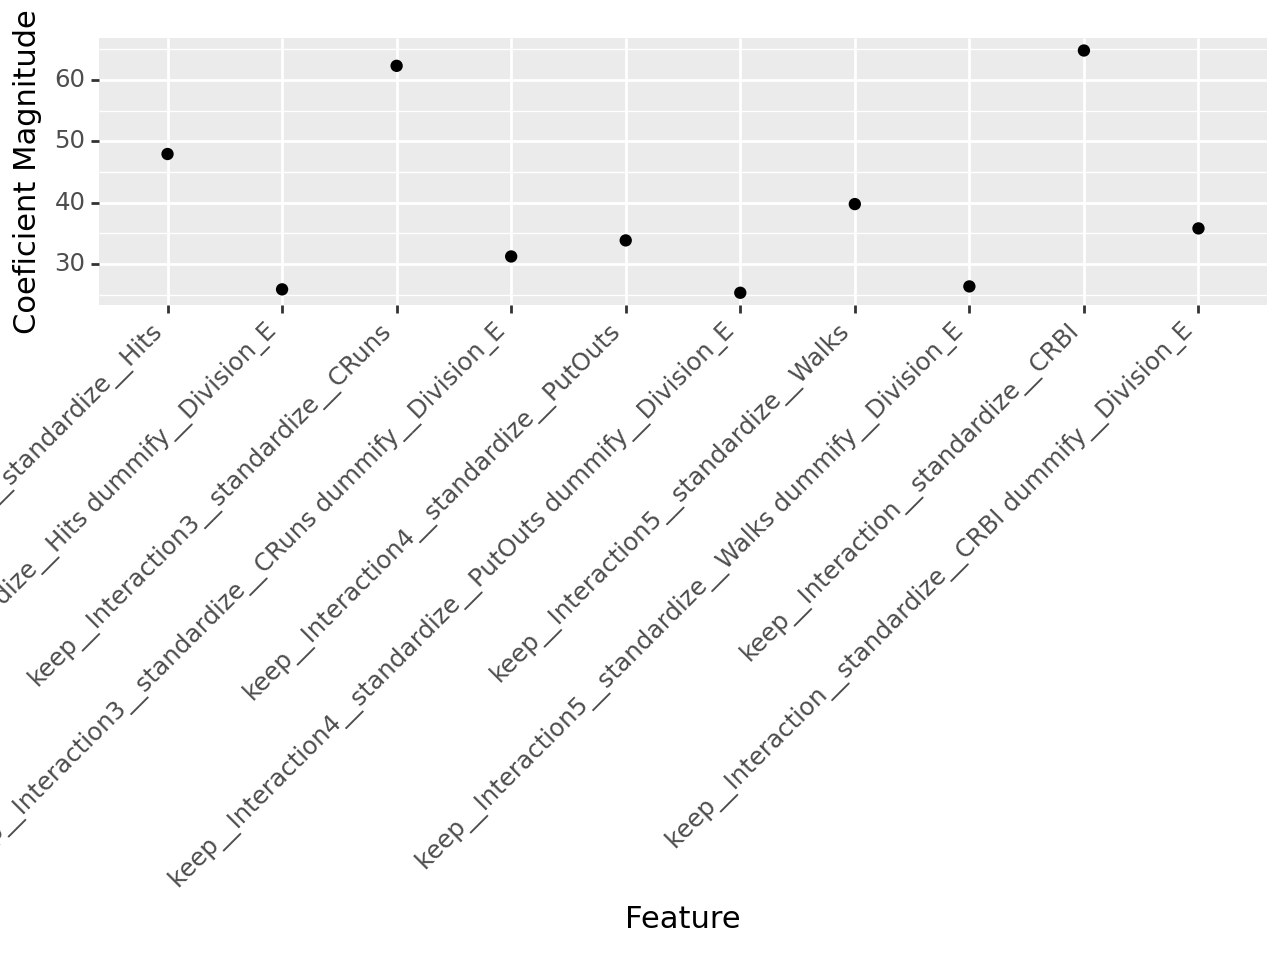

<Figure Size: (640 x 480)>

In [157]:
from plotnine import *

(
    ggplot(Final_df)
    + aes(x='Features', y = 'Coeficients')
    + geom_point()
    + labs(x='Feature', y = "Coeficient Magnitude")
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)

The final best model that we have found was the model that had an interaction between Division and the five most important numeric variables. It had the lowest cross validated mean squared error of any model looked at in this lab. The most important coeficients in the model based on magnitude are Career Runs, Career RBIs, and hits. 